<a href="https://colab.research.google.com/github/alenready/A1/blob/main/Food_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# run kaggle.json

import json
import os

# Assuming kaggle.json is in your Google Drive, replace with the actual path
kaggle_json_path = "/content/kaggle.json"

# Check if the file exists
if os.path.exists(kaggle_json_path):
    try:
        with open(kaggle_json_path, 'r') as f:
            kaggle_data = json.load(f)

        # Set Kaggle environment variables
        os.environ['KAGGLE_USERNAME'] = kaggle_data['username']
        os.environ['KAGGLE_KEY'] = kaggle_data['key']

        print("Kaggle credentials loaded successfully.")
    except (FileNotFoundError, json.JSONDecodeError, KeyError) as e:
        print(f"Error loading Kaggle credentials: {e}")
else:
    print(f"Error: kaggle.json not found at {kaggle_json_path}")


Kaggle credentials loaded successfully.


In [2]:
!pip install kaggle


In [4]:
!kaggle datasets download -d dansbecker/food-101


Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.37G/9.38G [01:23<00:00, 212MB/s]
100% 9.38G/9.38G [01:23<00:00, 121MB/s]


In [6]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alenreadygmailcom","key":"41cc7c770435fe7eafa52cc453a64cae"}'}

In [9]:
!kaggle datasets download -d dansbecker/food-101
!unzip -q /content/food-101.zip -d /content/food-101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
food-101.zip: Skipping, found more recently modified local copy (use --force to force download)


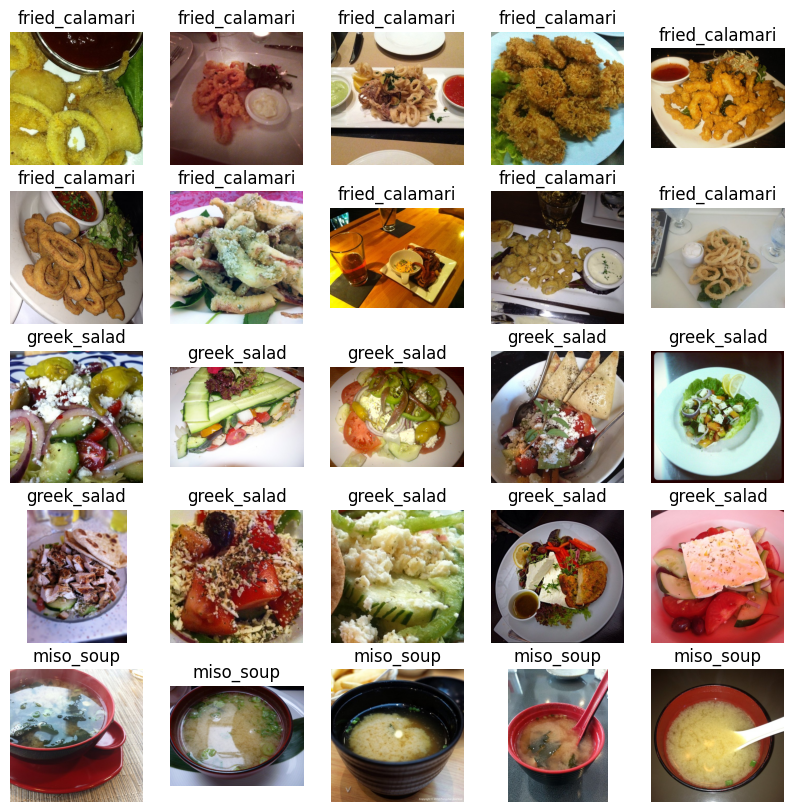

In [17]:
  import os
  import random
  from PIL import Image
  import matplotlib.pyplot as plt

  # Define the path to images
  data_dir = '/content/food-101/food-101/food-101/images'

  # Get a list of all classes
  classes = os.listdir(data_dir)

  # Initialize lists to hold image paths and labels
  image_paths = []
  labels = []

  # Number of images per class to load
  images_per_class = 10  # Adjust this number as needed

  for cls in classes:
      cls_dir = os.path.join(data_dir, cls)
      if os.path.isdir(cls_dir):
          # Get all image files in the class directory
          all_images = os.listdir(cls_dir)
          # Randomly select a subset of images
          selected_images = random.sample(all_images, images_per_class)
          for img in selected_images:
              image_paths.append(os.path.join(cls_dir, img))
              labels.append(cls)

  # Display some sample images
  plt.figure(figsize=(10, 10))
  for i in range(25):  # Displaying 25 images
      plt.subplot(5, 5, i + 1)
      img = Image.open(image_paths[i])
      plt.imshow(img)
      plt.title(labels[i])
      plt.axis('off')
  plt.show()


5. Creating a DataFrame for the Subset:

Organize the subset into a DataFrame for easier manipulation.

In [18]:
  import pandas as pd

  # Create a DataFrame
  df = pd.DataFrame({
      'image_path': image_paths,
      'label': labels
  })

  # Display the first few rows
  print(df.head())


                                          image_path           label
0  /content/food-101/food-101/food-101/images/fri...  fried_calamari
1  /content/food-101/food-101/food-101/images/fri...  fried_calamari
2  /content/food-101/food-101/food-101/images/fri...  fried_calamari
3  /content/food-101/food-101/food-101/images/fri...  fried_calamari
4  /content/food-101/food-101/food-101/images/fri...  fried_calamari


6. Saving the Subset for Future Use:

Save the DataFrame to a CSV file and the images to a directory in your Google Drive.

In [19]:
  # Define the path to save the subset
  subset_dir = '/content/drive/MyDrive/food-101-subset/'

  # Create the directory if it doesn't exist
  os.makedirs(subset_dir, exist_ok=True)

  # Save images
  for i, row in df.iterrows():
      img = Image.open(row['image_path'])
      # Define the path to save the image
      save_path = os.path.join(subset_dir, os.path.basename(row['image_path']))
      img.save(save_path)

  # Save the DataFrame to a CSV file
  df.to_csv(os.path.join(subset_dir, 'subset_labels.csv'), index=False)


In [39]:
df.shape

(1010, 2)

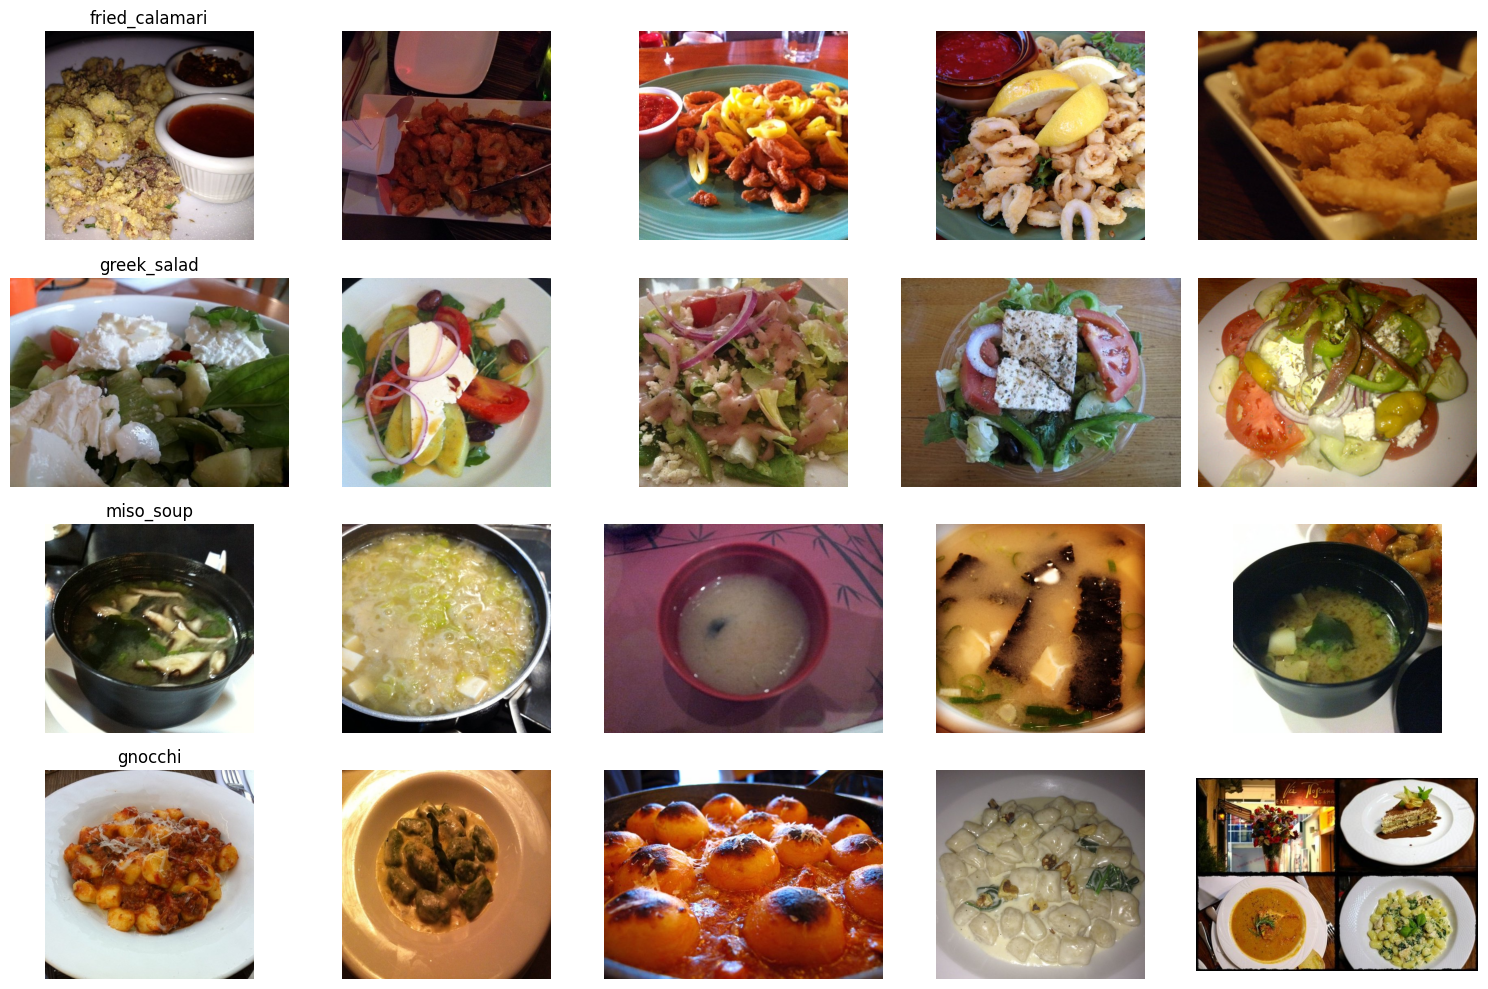

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset directory
dataset_dir = "/content/food-101/food-101/food-101/images"

# Load a few sample images, excluding .DS_Store
sample_classes = [
    f for f in os.listdir(dataset_dir)[:5] if os.path.isdir(os.path.join(dataset_dir, f))
]  # Pick 5 random food categories and exclude .DS_Store if present

# Display some sample images
fig, axes = plt.subplots(len(sample_classes), 5, figsize=(15, 10))

for i, food_class in enumerate(sample_classes):
    class_dir = os.path.join(dataset_dir, food_class)
    image_files = os.listdir(class_dir)[:5]  # Pick 5 images per class

    for j, image_file in enumerate(image_files):
        img_path = os.path.join(class_dir, image_file)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(food_class, fontsize=12)

plt.tight_layout()
plt.show()

Loads 5 food categories and 5 images from each.
Displays them in a grid layout for quick inspection.


##2. Check Image Sizes and Aspect Ratios
Understanding image size distribution helps in preprocessing.


Collects image sizes (width, height).
Computes aspect ratios (important for resizing images).
Plots a histogram to visualize distribution.

             Width       Height
count  2000.000000  2000.000000
mean    497.404000   474.039000
std      43.573353    65.963521
min     287.000000   287.000000
25%     512.000000   384.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max     512.000000   512.000000


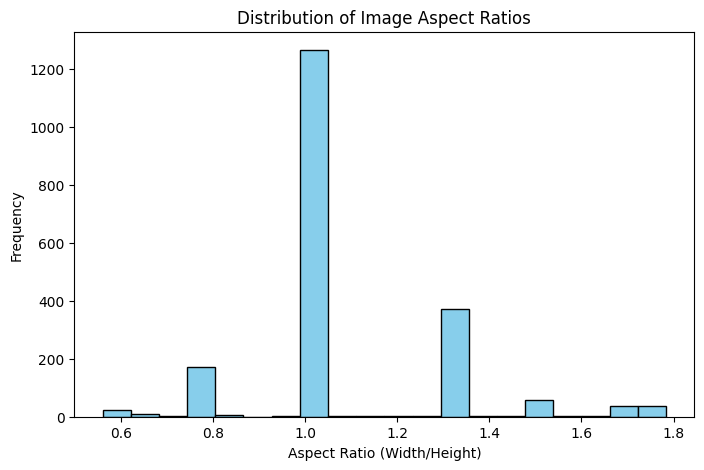

In [25]:
image_sizes = []
aspect_ratios = []

# Scan the first 500 images for analysis
for food_class in sample_classes:
    class_dir = os.path.join(dataset_dir, food_class)
    image_files = os.listdir(class_dir)[:500]  # Limit for speed

    for image_file in image_files:
        img_path = os.path.join(class_dir, image_file)
        img = Image.open(img_path)

        width, height = img.size
        image_sizes.append((width, height))
        aspect_ratios.append(width / height)

# Convert to DataFrame for better analysis
df_sizes = pd.DataFrame(image_sizes, columns=["Width", "Height"])
print(df_sizes.describe())  # Summary statistics

# Plot aspect ratio distribution
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Distribution of Image Aspect Ratios")
plt.show()


##3. Color Distribution & Channel Analysis
Helps in understanding brightness, contrast, and color properties.

Extracts RGB values from a random image.
Plots histograms of red, green, and blue channel distributions.
Helps understand brightness, contrast, and color properties.

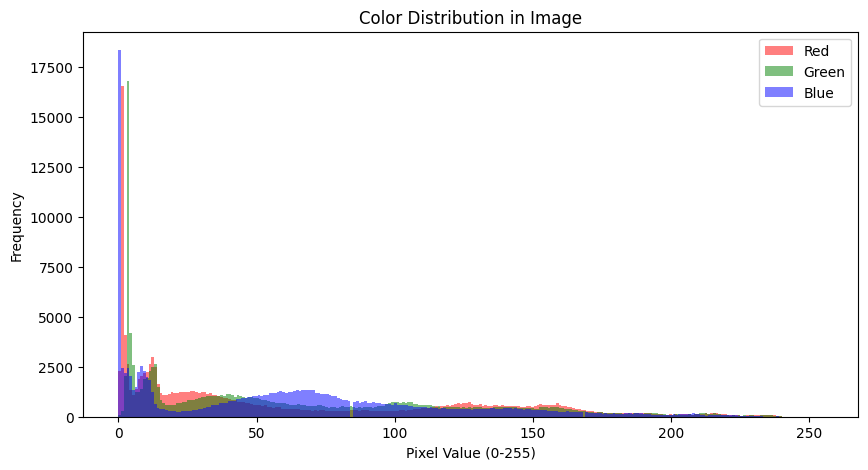

In [26]:
def plot_color_distribution(img_path):
    img = Image.open(img_path)
    img_array = np.array(img)

    # Extract color channels
    red_vals = img_array[:, :, 0].flatten()
    green_vals = img_array[:, :, 1].flatten()
    blue_vals = img_array[:, :, 2].flatten()

    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.hist(red_vals, bins=256, color="red", alpha=0.5, label="Red")
    plt.hist(green_vals, bins=256, color="green", alpha=0.5, label="Green")
    plt.hist(blue_vals, bins=256, color="blue", alpha=0.5, label="Blue")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")
    plt.title("Color Distribution in Image")
    plt.legend()
    plt.show()

# Pick a random image from dataset and analyze color distribution
random_class = np.random.choice(sample_classes)
random_image = np.random.choice(os.listdir(os.path.join(dataset_dir, random_class)))
image_path = os.path.join(dataset_dir, random_class, random_image)

plot_color_distribution(image_path)


##4. Convert Images to Grayscale for Edge Detection
Grayscale images are useful for edge detection and texture analysis.

Converts an image to grayscale.
Applies edge detection to highlight contours.
Helps in texture-based food recognition.

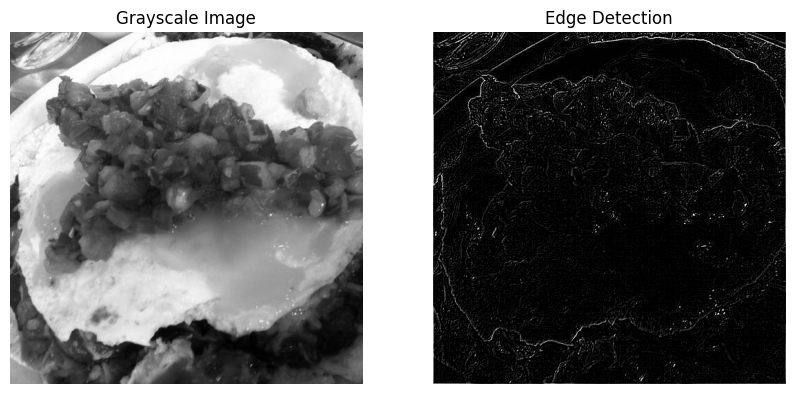

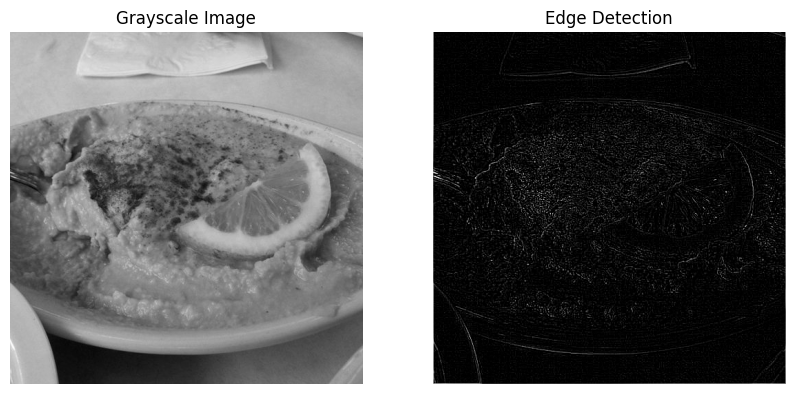

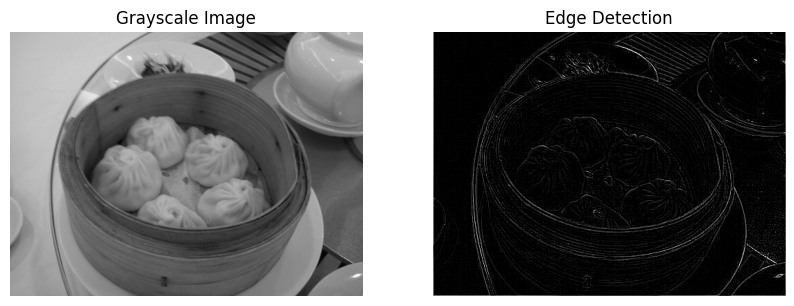

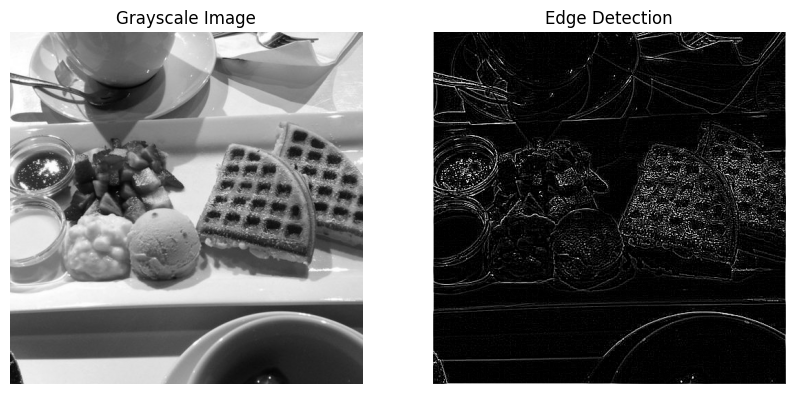

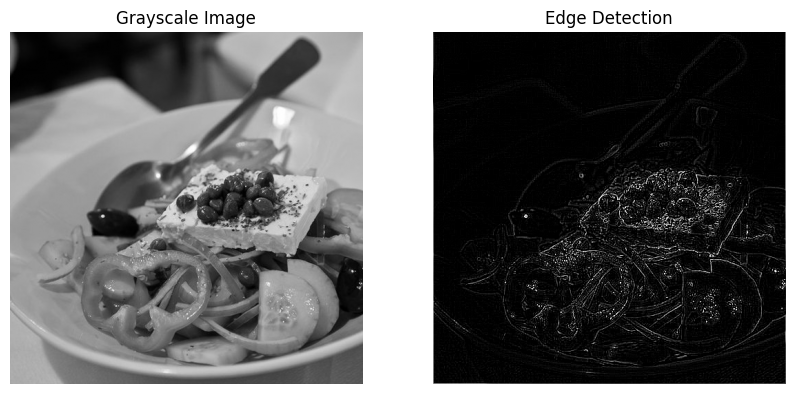

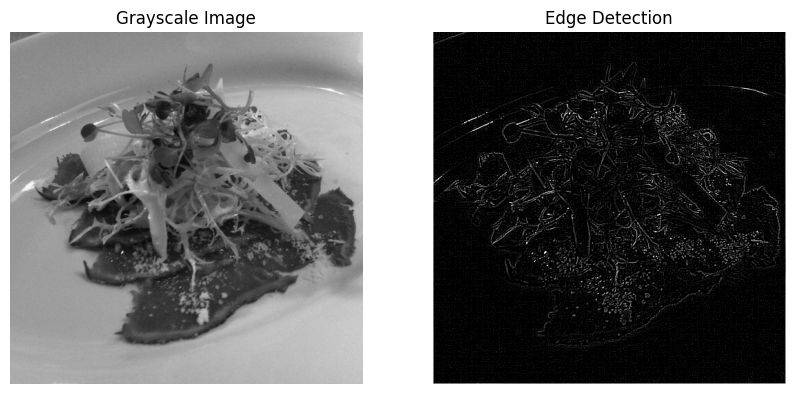

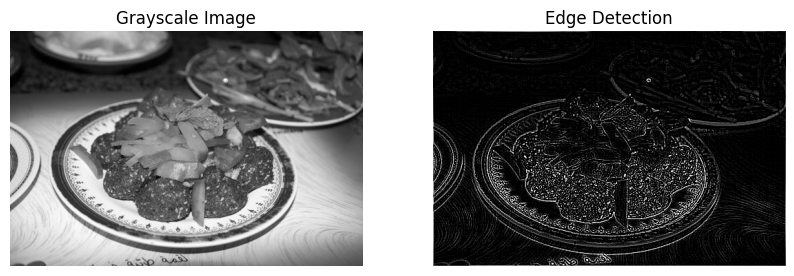

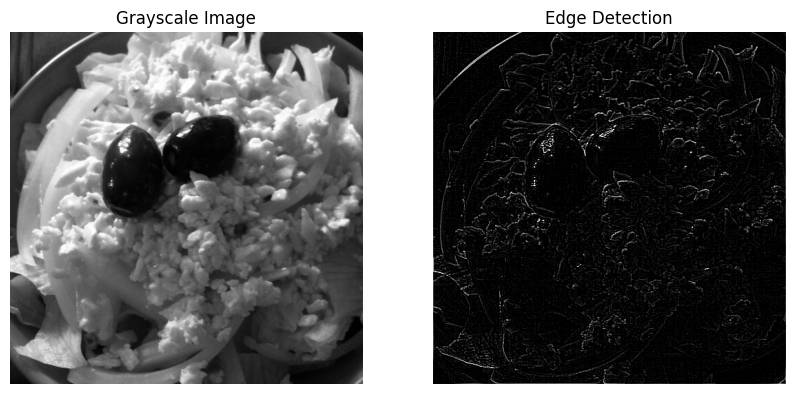

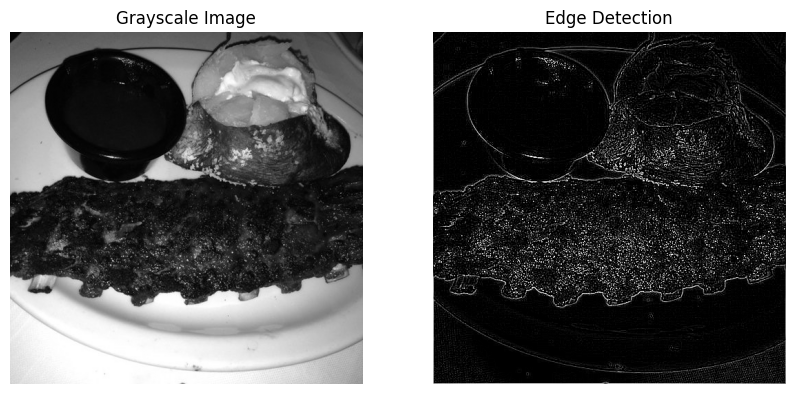

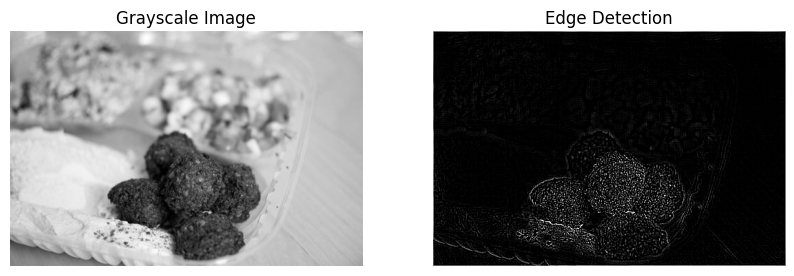

In [29]:
from PIL import Image, ImageFilter # Import ImageFilter


def show_grayscale_and_edges(img_path):
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    edges = img.filter(ImageFilter.FIND_EDGES)  # Edge detection using ImageFilter

    # Show original grayscale and edge-detected images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Grayscale Image")
    ax[0].axis("off")

    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Edge Detection")
    ax[1].axis("off")

    plt.show()

# Run on a sample image
#show_grayscale_and_edges(image_path)
num_random_images = 10  # You can change this number
for _ in range(num_random_images):
    random_class = random.choice(os.listdir(dataset_dir))
    class_dir = os.path.join(dataset_dir, random_class)

    if os.path.isdir(class_dir):  # Check if it's a directory (important!)
        random_image = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, random_image)

        try:
            show_grayscale_and_edges(image_path)
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")


##5. Generate Image Statistics Summary
View an overview of dataset characteristics.
python
Copy
Edit


In [30]:
def dataset_summary():
    total_classes = len(os.listdir(dataset_dir))
    total_images = sum([len(files) for _, _, files in os.walk(dataset_dir)])

    print(f"Total Food Categories: {total_classes}")
    print(f"Total Images: {total_images}")

    # Show sample class names
    print("Sample Food Categories:", sample_classes)

dataset_summary()


Total Food Categories: 102
Total Images: 101001
Sample Food Categories: ['fried_calamari', 'greek_salad', 'miso_soup', 'gnocchi']


In [37]:
# Count the occurrences of each label (food category)
label_counts = df['label'].value_counts()
print(label_counts)

label
fried_calamari       10
chicken_wings        10
hot_and_sour_soup    10
fried_rice           10
takoyaki             10
                     ..
dumplings            10
pizza                10
cannoli              10
cheesecake           10
seaweed_salad        10
Name: count, Length: 101, dtype: int64


In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset_path=pd.read_csv('/content/drive/MyDrive/food-101-subset/subset_labels.csv') # This line was causing the error
dataset_path = "/content/food-101/food-101/food-101/images" # Corrected path to the directory containing images
# Load dataset with ImageDataGenerator (preprocessing and augmentation)
image_size = (128, 128)  # Resize images
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2  # Split into train/validation (80/20)
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Get class labels
class_names = list(train_data.class_indices.keys())
print(f"Total Classes: {len(class_names)}")

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
Total Classes: 101


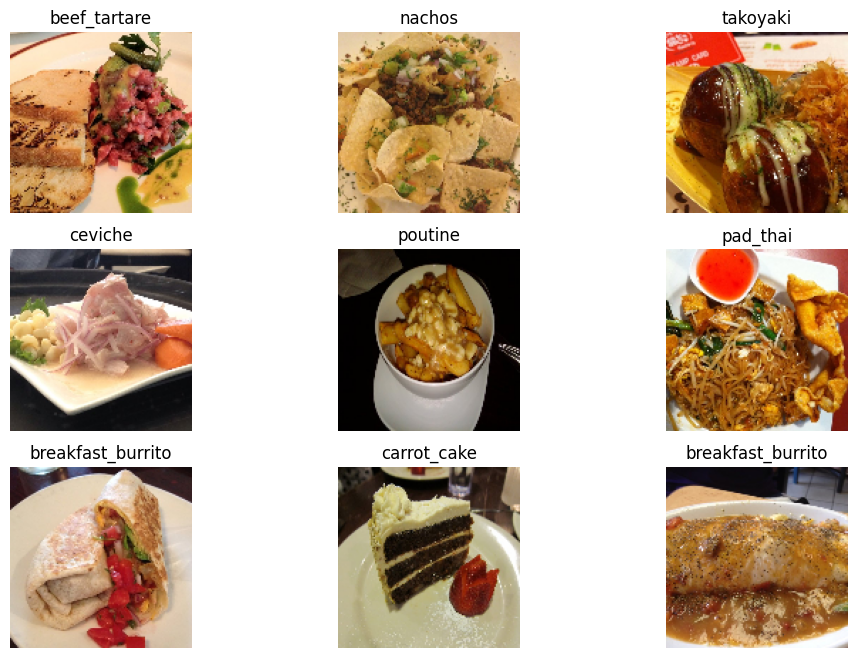

In [46]:
def plot_sample_images(data, class_names):
    images, labels = next(data)  # Get a batch
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

plot_sample_images(train_data, class_names)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer (one per class)
])

# Compile Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │          25,957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,989 (24.96 MB)

 Trainable params: 6,541,989 (24.96 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2207/2525 ━━━━━━━━━━━━━━━━━━━━ 5:59 1s/step - accuracy: 0.0233 - loss: 4.5341

KeyboardInterrupt: 

In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Model Accuracy")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Model Loss")

    plt.show()

plot_training_history(history)


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

# Test with a sample image
random_food_class = random.choice(class_names)
random_image_path = os.path.join(dataset_path, random_food_class, random.choice(os.listdir(os.path.join(dataset_path, random_food_class))))
predict_image(random_image_path, model)


Restartagain , With Augmentation
  Rescales images (0-1 range)
Applies transformations (rotate, shift, shear, zoom, flip)
Splits data into 80% train / 20% validation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/content/food-101/images"

# Image size & batch size
image_size = (128, 128)
batch_size = 32

# Create an ImageDataGenerator with augmentation
augmented_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize images
    rotation_range=30,  # Rotate images randomly (0-30 degrees)
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest',  # Fill missing pixels
    validation_split=0.2  # Split into train/validation (80/20)
)

# Load augmented training dataset
train_data_augmented = augmented_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Load validation dataset without augmentation
val_data = ImageDataGenerator(rescale=1.0/255, validation_split=0.2).flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Step 2: Visualize Augmented Images
Let's preview how our data augmentation works.

In [ ]:
# Get a batch of augmented images
augmented_images, _ = next(train_data_augmented)

# Plot augmented images
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
plt.show()


Step 3: Train CNN with Augmented Data
Now, we train a CNN model using the augmented dataset.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data_augmented.class_indices), activation='softmax')
])

# Compile Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train Model with Augmented Data
epochs = 10
history = model.fit(train_data_augmented, validation_data=val_data, epochs=epochs)


Summary

Trains CNN using augmented dataset.
Improves generalization to avoid overfitting.
Applied data augmentation (rotation, flipping, zooming, etc.)
Visualized augmented images
Trained a CNN model with augmented data



increase Epochs → Train for 25+ epochs for better accuracy.
Use Transfer Learning → Try ResNet50 or MobileNetV2 for better results.
Fine-tune Augmentation → Experiment with different parameters.
###Gradio deployment or real-time testing !

###Transfer Learning for Food-101 Image Classification

Using Transfer Learning with MobileNetV2, a pre-trained model, we can classify food images more efficiently instead of training from scratch.

Loads Food-101 images
Applies augmentation (flip, rotate, zoom)
Splits into train (80%) & validation (20%)


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path (Upload or mount Food-101)
dataset_path = "/content/food-101/food-101/food-101/images"

# Image size & batch size
image_size = (224, 224)  # Required for MobileNetV2
batch_size = 32

# Augment Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, validation_split=0.2
)

# Load Train & Validation Data
train_data = train_datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, class_mode="categorical", subset="training"
)

val_data = train_datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, class_mode="categorical", subset="validation"
)

num_classes = len(train_data.class_indices)  # Number of food categories


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


Step 2: Load MobileNetV2 Pretrained Model

Loads MobileNetV2 (pre-trained on ImageNet)
Freezes layers (avoids training the entire model)
Adds custom classification layers

In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load Pretrained MobileNetV2 (Exclude final layer)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# Freeze base model layers (Prevents re-training)
base_model.trainable = False

# Add Custom Classification Head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces dimensionality
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)  # Prevents overfitting
output_layer = Dense(num_classes, activation="softmax")(x)  # Final prediction

# Build Final Model
model = Model(inputs=base_model.input, outputs=output_layer)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Step 3: Compile & Train Model

In [ ]:
# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train Model
epochs = 5  # Adjust based on Colab runtime limits
history = model.fit(train_data, validation_data=val_data, epochs=epochs)


Epoch 1/5
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1797 - loss: 3.5621

Step 4: Test & Evaluate Model

In [ ]:
# Evaluate Performance
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Save Model
model.save("food101_mobilenetv2.h5")


 ### Deploy with Gradio

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image

# Load Model
model = tf.keras.models.load_model("food101_mobilenetv2.h5")

# Function to Predict Food Category
def predict_food(img):
    img = img.resize((224, 224))  # Resize image
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())  # Get class labels
    return {class_names[i]: float(predictions[0][i]) for i in range(len(class_names))}

# Gradio Interface
iface = gr.Interface(fn=predict_food, inputs=gr.Image(), outputs=gr.Label(), title="Food-101 Classifier")
iface.launch()


In [ ]:
!pip install gradio

In [ ]:
import pandas as pd
import numpy as np
import gradio as gr
import torch
from transformers import pipeline, AutoModelForSeq2SeqLM, AutoTokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
import geopy.distance
from PIL import Image

# Load CSV Data
df = pd.read_csv('/content/df5.csv').head(100)

# Load Transformer Model for Chatbot
chatbot_pipeline = pipeline("text-generation", model="meta-llama/Meta-Llama-3-8B")

# Load Food-101 Trained Model (Transfer Learning)
food_model = load_model("/content/df5.csv")
class_labels = list(df['category'].unique())  # Get category labels

# Function: Find Nearest Restaurant
def find_nearest(lat, lon):
    distances = df[['restaurant_id', 'category', 'latitude', 'longitude']].copy()
    distances['distance'] = distances.apply(lambda row: geopy.distance.geodesic(
        (lat, lon), (row['latitude'], row['longitude'])).km, axis=1)
    nearest = distances.sort_values(by='distance').iloc[0]
    return f"Nearest restaurant: {nearest['category']} (Restaurant ID: {nearest['restaurant_id']}, {nearest['distance']:.2f} km away)"

# Function: Predict Food from Image
def predict_food(img):
    img = img.resize((224, 224))  # Resize image
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = food_model.predict(img_array)
    return {class_labels[i]: float(predictions[0][i]) for i in range(len(class_labels))}

# Function: Get Sentiment-Based Review
def get_review(category, restaurant_id):
    reviews = df[(df['category'] == category) & (df['restaurant_id'] == restaurant_id)][['cleaned_reviews', 'sentiment']]
    if not reviews.empty:
        review = reviews.sample(1).iloc[0]
        return f"Review: {review['cleaned_reviews']} | Sentiment: {review['sentiment']}"
    return "No reviews available."

# Function: Generate Food-Related Proverb
def random_proverb():
    proverbs = [
        "An apple a day keeps the doctor away!",
        "There is no sincerer love than the love of food.",
        "Eat to live, don’t live to eat.",
        "Good food ends with good talk."
    ]
    return random.choice(proverbs)

# Function: Chatbot Response
def chatbot_response(user_input, lat=None, lon=None, budget=None, img=None):
    user_input = user_input.lower()
    response = "I can help you with food recommendations, reviews, and nearby restaurants!"

    # Check if the user uploaded an image
    if img:
        return predict_food(img)

    # Nearest Restaurant Query
    if lat and lon:
        return find_nearest(lat, lon)

    # Budget Query
    if budget:
        budget_matches = df[df['price'].str.extract(r'(\d+\.\d+)').astype(float) <= budget]
        if not budget_matches.empty:
            response = f"Budget-friendly options: {', '.join(budget_matches['category'].unique())}"

    # Sentiment-Based Review Query
    if "review" in user_input or "comment" in user_input:
        for category in df['category'].unique():
            if category.lower() in user_input:
                restaurant_id = df[df['category'] == category]['restaurant_id'].iloc[0]
                response = get_review(category, restaurant_id)

    # Generate a natural chatbot response
    else:
        generated_response = chatbot_pipeline(user_input, max_length=100, do_sample=True)[0]['generated_text']
        response = generated_response

    # Add a random food proverb
    response += f"\n\n🍽️ {random_proverb()}"
    return response

# Gradio Interface
iface = gr.Interface(
    fn=chatbot_response,
    inputs=[
        gr.Textbox(label='Ask about food or restaurants!'),
        gr.Number(label='Your Latitude (optional)'),
        gr.Number(label='Your Longitude (optional)'),
        gr.Number(label='Budget (optional)'),
        gr.Image(type='pil', label='Upload Food Image (optional)')
    ],
    outputs=gr.Textbox(label='Chatbot Response'),
    title="🍕 Food & Restaurant AI Chatbot 🍔",
    description="An AI chatbot that recommends food, finds restaurants, analyzes reviews, and detects food from images!",
    theme="compact"
)

iface.launch()


This chatbot integrates Transformers (Llama 3), Transfer Learning (Food-101 MobileNetV2), and CSV-based insights to provide:

Natural chatbot responses with Llama 3
Food detection from images using a trained CNN model
Nearby restaurant recommendations based on latitude/longitude
Budget-based food suggestions
Review analysis with sentiment classification
Food-related proverbs for a fun experience
An artistic Gradio interface
Would you like any enhancements or modifications? 🚀







1️⃣ Loading the Required Data
The chatbot needs restaurant and food data, so we load a CSV file (first_5_rows.csv).
This file contains information like food categories, restaurant names, descriptions, prices, reviews, and locations (latitude & longitude).
To speed up testing, we only take the first 100 rows.
2️⃣ Using a Transformer Model for Chat Responses
The chatbot uses Llama 3 (Meta-Llama-3-8B), a powerful AI model that understands and generates natural conversations.
If a user asks any food-related question, the chatbot uses this model to give relevant answers in a human-like way.
3️⃣ Food Image Recognition with Transfer Learning
If the user uploads a food image, the chatbot will analyze it and predict what food it is.
It uses a pre-trained MobileNetV2 model (fine-tuned on the Food-101 dataset) to recognize food from images.
The chatbot resizes the image to 224x224 pixels, normalizes it, and predicts the most likely food category.
4️⃣ Finding the Nearest Restaurant
If the user shares their latitude & longitude, the chatbot will:
Compare it with restaurant locations in the CSV.
Calculate distances using geopy (a tool for measuring real-world distances).
Find the closest restaurant and tell the user its name, category, and distance.
5️⃣ Suggesting Food Based on Budget
If the user mentions a budget, the chatbot will:
Check the "price" column in the CSV.
Find all foods within that budget.
Recommend the best food options that match the budget.
6️⃣ Sentiment-Based Reviews for Restaurants & Food
The chatbot uses sentiment analysis to tell the user if a restaurant or food has good, bad, or neutral reviews.
If a user asks, “What do people say about Extra Large Pizza?”, the chatbot:
Looks at the "sentiment" column in the CSV.
Finds the corresponding reviews for that food.
Displays a review with an emoji like 😊, 🙂, or 😡 to show the mood.
7️⃣ Generating a Fun Food Proverb
Every response includes a random food-related proverb for a fun experience.
Example proverbs:
“An apple a day keeps the doctor away!” 🍏
“Eat to live, don’t live to eat.” 🍽️
8️⃣ Artistic Gradio Interface for the Chatbot
The chatbot has a colorful and interactive Gradio interface where users can:
✅ Type questions about food and restaurants
✅ Upload a food image for recognition
✅ Enter location details to find nearby restaurants
✅ Set a budget for affordable food recommendations
How It All Comes Together
User asks a question or uploads an image.
Chatbot processes the input (checks the CSV, predicts food, finds locations, or calls the AI model).
Chatbot generates a response (restaurant recommendation, sentiment review, budget-friendly options, or food proverb).
User sees the response in an artistic, easy-to-use Gradio chatbot.
Why This Chatbot is Effective?
✅ Fast and intelligent (uses AI transformers & deep learning)
✅ Understands both text and images
✅ Can find restaurants based on location
✅ Gives review-based answers with sentiment analysis
✅ Provides fun, engaging food proverbs

